# JSC270S - Tutorial \#2 : Influenza Survelliance in Canada

## Profs. F. Chevalier and N. Taback


## Lab Date: January 23, 2019
## Time: 12:00 - 14:00
## Location: BA 3175


****
## Instructions

- Make a copy of this notebook.

- The notebook should be named: jsc270_tut2_answers_lastname_studentnumber, where "lastname" is your last name, and "studentnumber" is your UofT student number.

- Answer the questions in the cells that indicate where your answers should be placed. Leave the initial comment in the code cell and heading (indicated by `# Answer for qustion XX`).  For example, place your code for Question 1 in the code cell with comment `# Enter your answer for Question 1 into this cell` (remember not to delete this comment).

- Make sure that you explain your solutions when asked and comment your code. 

- Commit and push changes to the Github classroom repository that we has been provided (more details below).


### What should be submitted?

- A *Jupyter notebook* using Python that contains all the data analyses. Make sure to comment your code in the code cells.

- Additional files that your notebook requires to compile properly (e.g. a data file).

- A pdf of your Jupyter notebook exported as a pdf file.  This can be done using [`nbconvert`](https://nbconvert.readthedocs.io/en/latest/install.html).


### When should it be submitted?

*This tutorial consists of a 2-step submission as follows:*

- **At the end of the tutorial (in-lab tutorial assignment)**: Commit and push your notebook to the Github classroom repository that contains your answers (i.e., the file named: jsc270_tut2_answers_lastname_studentnumber.ipynb) before 14:10 on the day of the tutorial, January 23.

- In between January 23, 14:10 p.m. and January 28, 11:30 you should commit and push your answer notebook as you work on the assignment during the week. Commiting and pushing often is good practice (and as a bonus you will have a backup and be able to revisit previous version).

- [`nbdime`](https://nbdime.readthedocs.io/en/latest/) is a Python package that allows you (and the teaching team) to the changes you have made to your assignment. 

- **Homework (tutorial assignment completion)**: Push your completed tutorial by 11:30, Monday, January 28.  Your last commit closest to 11:30 will be considered your final assignment.

### Where should the assignment be submitted?

Push your finished notebook and any other files on Github, through the following link: <https://classroom.github.com/a/gH0AsH-r>

Upload the pdf of your answer notebook to the JSC270 course page on Quercus.

***

## Tutorial Grading

Tutorials will be graded according to the following marking scheme.

<table>
  <tr>
    <th></th>
    <th>Marks</th>
  </tr>
  <tr>
    <td>Tutorial Participation</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Attendance for entire tutorial</td>
    <td>5</td>
  </tr>
  <tr>
    <td>In-lab tutorial assignment</td>
    <td>20</td>
  </tr>
  <tr>
    <td>Tutorial assignment completion</td>
    <td>20</td>
  </tr>
</table>


### Grading Rubric for Tutorial Assignments

Tutorial grading rubric is available [here](https://jsc270.github.io/tut_docs.html#tutorial_grading).


***

## Tutorial objectives
The goal of this tutorial is to explore questions related to the distribution of influenza in Canada.

# Question 1

[FluWatch](https://www.canada.ca/en/public-health/services/diseases/flu-influenza/influenza-surveillance.html) is Canada's national surveillance system that monitors the spread of flu and flu-like illnesses.

(a) Write a Python program to scrape (read in) the data in [Table 2](https://www.canada.ca/en/public-health/services/surveillance/respiratory-virus-detections-canada/2018-2019/respiratory-virus-detections-isolations-week-01-ending-january-5-2019.html) into a pandas data frame. Use the table to create a dataframe that contains one row for each province or territory.

In [2]:
# code for question 1 (a)
import pandas as pd
website = 'https://www.canada.ca/en/public-health/services/surveillance/'+ \
          'respiratory-virus-detections-canada/2018-2019/'+ \
          'respiratory-virus-detections-isolations-week-01-ending-january-5-2019.html'
data = pd.read_html(website, header = 0)
fludat = data[1].iloc[[0, 1, 2, 3, 11, 28, 29, 32, 33, 35, 36, 37, 38]]

(b) "The geographical regions of Canada are groupings of provinces and territories established for the purpose of statistical reporting" (see [Statistics Canada](https://www150.statcan.gc.ca/n1/pub/92-195-x/2011001/geo/region/region-eng.htm)).  Wikipedia has a table with the provinces and territories classified by the six-regions used by Statistics Canada.  

(i) Write a Python program to scrape the [table under National regions](https://en.wikipedia.org/wiki/List_of_regions_of_Canada#National_regions) into a pandas dataframe using Python.

(ii) Write Python code to create a data frame that contains two columns: provinces/territories and regions. 

(iii) Write Python code to create another dataframe that contains the following data for each province/territory: 

- Flu Tested; 
- A(H1N1)pdm09 Positive; 
- A(H3) Positive; 
- A(UnS) Positive; 
- Total Flu A Positive;
- Proportion of Flu A Positive (defined as the ratio of Total Flu A Positive to Flu Tested);
- Geographical region of Canada (using the Statistics Canada definition) (this variable should be added to your data frame using Python code).

<br>

Statistical note:  The dataframes that you create in this question are often referred to as a **contingency table** in statistics.  In general: let $X$ be a categorical random variable that has $I$ levels, and $Y$ a categorical random variable having $J$ levels. A table displaying the $IJ$ possible frequency counts of outcomes is called a *contingency table*.

In [3]:
# code for question 1 (b)

# i.
regions = pd.read_html('https://en.wikipedia.org/wiki/'+ \
                       'List_of_regions_of_Canada#National_regions', 
                       header=0)

In [4]:
# ii.
region_map = regions[0][['All provinces and territories', 
                         'Six-region model[1]']].fillna(method='ffill')\
            .rename(index=str, columns=
                    {'All provinces and territories':'provinces/territories', 
                                        'Six-region model[1]':'regions'})
region_map = region_map.astype(str)

In [5]:
# iii.
df_fludat_select = fludat.iloc[:,0:6]
df_fludat_select.iloc[:, 1:6] = \
    df_fludat_select.iloc[:, 1:6].astype(int)
df_fludat_select['Proportion of Flu A Positive'] = \
    df_fludat_select['Flu Tested'] \
    / df_fludat_select['Total Flu A Positive']
df_fludat_select.rename(columns = 
                        {'Reporting Laboratory': 'provinces/territories'}, 
                        inplace=True)

# clean the difference between province names
def rename(cell):
    cell = 'Newfoundland and Labrador' if cell == 'Newfoundland' else cell
    cell = cell.replace('Province of ','')
    return str(cell)

df_fludat_select['provinces/territories'] = \
    df_fludat_select['provinces/territories'].apply(rename)
df_fludat_select.loc[11, 'provinces/territories'] = 'Quebec'
df_fludat_select = \
    df_fludat_select.join(region_map.set_index('provinces/territories'), 
                          on='provinces/territories')
df_fludat_select

C:\Users\lihd1\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\lihd1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lihd1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import

,provinces/territories,Flu Tested,A(H1N1)pdm09 Positive,A(H3) Positive,A(UnS) Positive,Total Flu A Positive,Proportion of Flu A Positive,regions
0,Newfoundland and Labrador,1299,1,0,113,114,11.3947,Atlantic
1,Prince Edward Island,307,38,0,0,38,8.07895,Atlantic
2,Nova Scotia,864,0,0,52,52,16.6154,Atlantic
3,New Brunswick,4271,42,1,715,758,5.63456,Atlantic
11,Quebec,38395,0,0,5974,5975,6.42594,Quebec
28,Ontario,23795,752,180,546,1478,16.0995,Ontario
29,Manitoba,4911,192,3,486,681,7.21145,Prairies
32,Saskatchewan,8391,1280,60,749,2089,4.01675,Prairies
33,Alberta,18824,3132,73,1540,4745,3.96712,Prairies
35,British Columbia,8731,1010,75,755,1840,4.74511,British Columbia


***
A categorical variable is one for which the measurement scale consists of a set of categories. Categorical variables for which levels do not have a natural ordering are called *nominal variables*.  Categorical variables that have ordered levels are called *ordinal variables*. Categorical variables that have numerical distances between two levels of the scale are often called *interval variables*. 

Categorical variables can attain a discrete number of values while a continuous variable can attain values that are a subset of the real numbers.

***

(c) Classify the variables in the data frame in Question 1(b)(iii) as either nominal, ordinal, interval, or continuous. Briefly explain your reasoning.  

# Answer for Question 1 (c)

- Nominal variables are provinces/territories and regions since they are categorical data without natural ordering
- All the rest variables (Flu Tested, A(H1N1)pdm09 Positive, A(H3) Positive, A(UnS) Positive, Total Flu A Positive, Proportion of Flu A Positive) are continuous data since since these variables cannot be attained by a discrete number of values. 


# Question 2

(a) Create *appropriate* numerical summaries and visualizations for each of the variables in the data frame in Question 1 (b)(iii). Briefly describe the distributions of each variable.  

In [34]:
# code for question 2 (a)
import matplotlib as mpl
import matplotlib.pyplot as plt

df_fludat_select

,provinces/territories,Flu Tested,A(H1N1)pdm09 Positive,A(H3) Positive,A(UnS) Positive,Total Flu A Positive,Proportion of Flu A Positive,regions
0,Newfoundland and Labrador,1299,1,0,113,114,11.394737,Atlantic
1,Prince Edward Island,307,38,0,0,38,8.078947,Atlantic
2,Nova Scotia,864,0,0,52,52,16.615385,Atlantic
3,New Brunswick,4271,42,1,715,758,5.634565,Atlantic
11,Quebec,38395,0,0,5974,5975,6.425941,Quebec
28,Ontario,23795,752,180,546,1478,16.099459,Ontario
29,Manitoba,4911,192,3,486,681,7.211454,Prairies
32,Saskatchewan,8391,1280,60,749,2089,4.016754,Prairies
33,Alberta,18824,3132,73,1540,4745,3.967123,Prairies
35,British Columbia,8731,1010,75,755,1840,4.745109,British Columbia


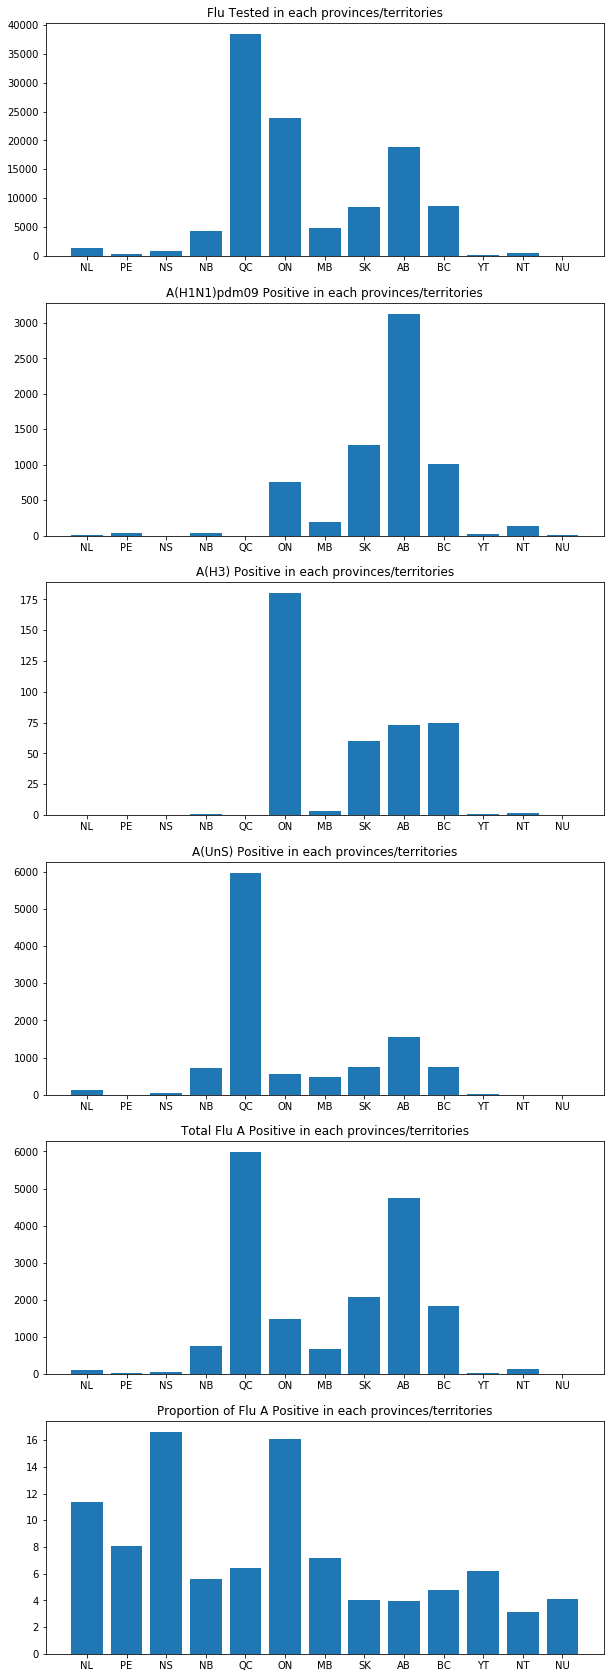

In [35]:
df_fludat_select['abbrv'] = ['NL', 'PE','NS', 'NB','QC', 'ON', 'MB'
                             ,'SK','AB','BC','YT', 'NT', 'NU']
fig, axs = plt.subplots(6, 1, figsize=(10, 30))
index = 0
for column in df_fludat_select.columns.values[1:-2]:
    axs[index].bar(df_fludat_select['abbrv'], df_fludat_select[column])
    axs[index].set_title(str(column) + ' in each provinces/territories')
    index += 1

# Answer for Question 2 (a)

 - Flu Tested: most flu tests are done in Quebec, Ontario, or Alberta, and Quebec has the largest number of tests. 
 - A(H1N1)pdm09 Positive: Alberta has a much larger number of H1N1 postive cases compared to other provinces/terriotiries, then Saskatchewan, British Columbia, and Ontario also have a larger number of H1N1 positive cases than the rest. 
 - A(H3) Positive: Ontario has the largest number of H3 positive cases among all, then Saskatchewan, Alberta, British Columbia also have a larger number of H3 positive cases than the rest.  
 - A(UnS) Positive: Quebec has a much larger number (4-6 times) of unsubtyped positive cases compared to all other provinces. 
 - Total Flu A Positive: Quebec and Alberta have a higher number of Flu A positive cases compared to the rest, then British Columbia, Saskatchewan, Ontario also have many Flu A positive cases. 
 - Proportion of Flu A Positive: Nova Scotia, Ontario, and Newfoundland and Labrador have a higher proportion of Flu A Positive, the rest provinces have a more evenly distributed proportion. 

(b) Create two visualizations to explore the relationship between the proportion of Flu A Positive, the number tested, and geographical region.  Describe the relationships you observe.  Which visualization do prefer?  Why?  

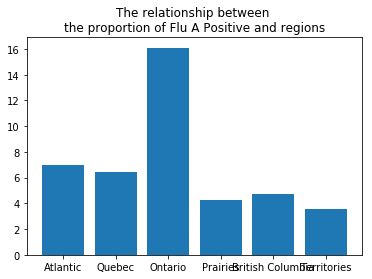

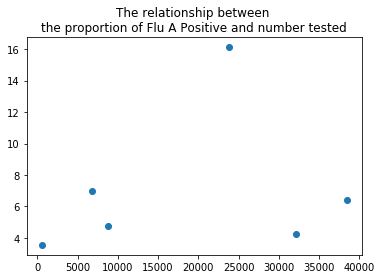

In [36]:
# code for question 2 (b)

# use a dataframe to get the data for regions
df_region_fludat = pd.DataFrame()
df_region_fludat['regions'] = \
    df_fludat_select['regions'].drop_duplicates()
for column in df_fludat_select.columns.values[1:-2]:
    df_region_fludat[column] = \
        [sum(df_fludat_select.loc[df_fludat_select['regions'] == region][column]) 
        for region in df_region_fludat['regions']]

df_region_fludat['Proportion of Flu A Positive'] = \
    df_region_fludat['Flu Tested'] \
    / df_region_fludat['Total Flu A Positive']


fig = plt.figure()
plt.bar(df_region_fludat['regions'], 
        df_region_fludat['Proportion of Flu A Positive'])
plt.title('The relationship between \n' + \
           'the proportion of Flu A Positive and regions')
plt.show()

fig = plt.figure()
df_sort = df_region_fludat.sort_values('Flu Tested')
plt.scatter(df_sort['Flu Tested'], 
            df_sort['Proportion of Flu A Positive'])
plt.title('The relationship between \n' + \
          'the proportion of Flu A Positive and number tested')
plt.show()

# Answer for Question 2 (b)

- From the relationship between the proportion of Flu A Positive and regions, we observe that most regions have the same proportion of Flu A Positive, while Ontario has twice the proportion to other regions. 
- From the The relationship between the proportion of Flu A Positive and number tested, we observe that there is no strong correlation between the two variables, hence there is some evidence that there is no relationship between the proportion of Flu A Positive and number tested. 

# Question 3

>In August 2010, the World Health Organization declared the pandemic over. Since that time, scientists have changed the way they name viruses. The H1N1 virus is now known as H1N1v. The v stands for variant and indicates that the virus normally circulates in animals but has been detected in humans. Since 2011, another strain, H3N2v, has been circulating in humans and also causes the flu. Both strains are included in the flu vaccine for 2018-19. ([see Mayo Clinic Swine Flu](https://www.mayoclinic.org/diseases-conditions/swine-flu/symptoms-causes/syc-20378103)) 

The dataframe in Question 1(b)(iii) contains data on the subtype of influenza A: H1N1; H3N2; and unsubtyped (i.e., neither H1N1 or H3N2).  Is the distribution of influenza A subtype the same in each province and territory?

(a) Create two dataframes that display the distribution of influenza subtype for each province and territory: 

(i)  The first dataframe should contain the counts of the numbers of positive cases for each subtype.
(ii) The second dataframe should contain the proportion of cases for each subtype within each province and territory. 

Does the distribution of subtype of influenza A differ by province/territory? Explain.

In [37]:
# code for question 3(a)
df_sub_sum = df_fludat_select.iloc[:,[0,-1, 2,3,4]]
df_sub_sum

,provinces/territories,abbrv,A(H1N1)pdm09 Positive,A(H3) Positive,A(UnS) Positive
0,Newfoundland and Labrador,NL,1,0,113
1,Prince Edward Island,PE,38,0,0
2,Nova Scotia,NS,0,0,52
3,New Brunswick,NB,42,1,715
11,Quebec,QC,0,0,5974
28,Ontario,ON,752,180,546
29,Manitoba,MB,192,3,486
32,Saskatchewan,SK,1280,60,749
33,Alberta,AB,3132,73,1540
35,British Columbia,BC,1010,75,755


In [38]:
df_sub_ratio = pd.DataFrame()
df_sub_ratio['provinces/territories'] = df_fludat_select.iloc[:,0]
df_sub_ratio['abbrv'] = df_fludat_select.iloc[:,-1]
for column in df_fludat_select.columns.values[2:5]:
    df_sub_ratio[column] = df_fludat_select[column] / df_fludat_select.iloc[:,5]
df_sub_ratio

,provinces/territories,abbrv,A(H1N1)pdm09 Positive,A(H3) Positive,A(UnS) Positive
0,Newfoundland and Labrador,NL,0.008772,0.000000,0.991228
1,Prince Edward Island,PE,1.000000,0.000000,0.000000
2,Nova Scotia,NS,0.000000,0.000000,1.000000
3,New Brunswick,NB,0.055409,0.001319,0.943272
11,Quebec,QC,0.000000,0.000000,0.999833
28,Ontario,ON,0.508796,0.121786,0.369418
29,Manitoba,MB,0.281938,0.004405,0.713656
32,Saskatchewan,SK,0.612733,0.028722,0.358545
33,Alberta,AB,0.660063,0.015385,0.324552
35,British Columbia,BC,0.548913,0.040761,0.410326


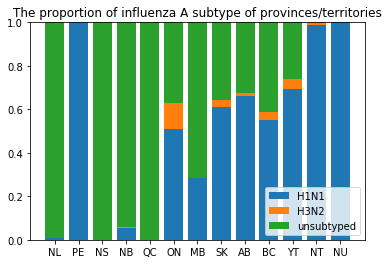

In [39]:
fig = plt.figure()
p1 = plt.bar(df_sub_ratio['abbrv'], 
             df_sub_ratio['A(H1N1)pdm09 Positive'])
p2 = plt.bar(df_sub_ratio['abbrv'], 
             df_sub_ratio['A(H3) Positive'], 
             bottom=df_sub_ratio['A(H1N1)pdm09 Positive'])
p3 = plt.bar(df_sub_ratio['abbrv'],
             df_sub_ratio['A(UnS) Positive'], 
             bottom=df_sub_ratio['A(H3) Positive'] \
             + df_sub_ratio['A(H1N1)pdm09 Positive'])
plt.title("The proportion of influenza A subtype of provinces/territories")
plt.legend((p1[0], p2[0],p3[0]), ('H1N1', 'H3N2','unsubtyped'), loc=4)
plt.show()

# Answer for Question 3 (a)

- From the bar graph above, it's easy to see that the distribution of subtype of influenza A differ by province/territory.

(b) Write Python code to calculate the proportion of postive cases in all provinces/territories that are H1N1, H3N2, and unsubtyped? 

In [40]:
number = [sum(df_sub_sum.iloc[:,2]), 
          sum(df_sub_sum.iloc[:,3]), 
          sum(df_sub_sum.iloc[:,4])]
entire_sample = pd.DataFrame({'H1N1': [number[0]/sum(number)], 
                              'H3N2': [number[1]/sum(number)], 
                              'unsubtyped': [number[2]/sum(number)]})
entire_sample

,H1N1,H3N2,unsubtyped
0,0.368395,0.022018,0.609588


(c) If the distribution of influenza A subtype is independent of province/territory then we would expect the proportion of each influenza A subtype within each province/territory to be the same as the proportion of influenza A subtype in the entire sample.  Create an appropriate plot to investigate if influenza A and province/territory are independent.  Is there evidence that influenza A and province/territory are independent? Briefly explain.  

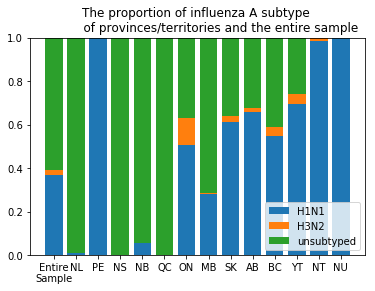

In [41]:
names = ['Entire\nSample']
names.extend(df_sub_ratio['abbrv'])
h1n1 = entire_sample['H1N1'].append(df_sub_ratio['A(H1N1)pdm09 Positive'])
h3n2 = entire_sample['H3N2'].append(df_sub_ratio['A(H3) Positive'])
unsub = entire_sample['unsubtyped'].append(df_sub_ratio['A(UnS) Positive'])
fig = plt.figure()

p1 = plt.bar(names, h1n1)
p2 = plt.bar(names, h3n2, bottom=h1n1)
p3 = plt.bar(names, unsub, bottom=h3n2+h1n1)
plt.title("The proportion of influenza A subtype \n \
           of provinces/territories and the entire sample")
plt.legend((p1[0], p2[0],p3[0]), ('H1N1', 'H3N2','unsubtyped'), loc=4)
plt.show()

# Answer for Question 3 (c)

- From the plot above we can see that each province/territory have different proportion of influenza A subtype, and their distribution are different from the entire sample. Therefore, there is little evidence that influenza A and province/territory are independent. 


# Question 4

One formal statistical test of independence for two categorical variables is called the chi-square test of independence.  The main implementation of this test in Python is in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency).  The references in the documentation provide explanations of this test. Another good basic reference for the chi-square test of independence is available in section 3.3 of [Intro Stat with Randomization and Simulation](https://www.openintro.org/stat/textbook.php?stat_book=isrs).

We will study statistical testing later in the course, but for now use the resources above or other resources, to answer the following questions. 

(a) Create a contingency table of region and influenza A subtype.

In [42]:
df_region_subtype = df_region_fludat.iloc[:, [0, 2,3,4]]
df_region_subtype

,regions,A(H1N1)pdm09 Positive,A(H3) Positive,A(UnS) Positive
0,Atlantic,81,1,880
11,Quebec,0,0,5974
28,Ontario,752,180,546
29,Prairies,4604,136,2775
35,British Columbia,1010,75,755
36,Territories,162,3,6


(b) Create a table that displays the conditional distribution of influenza A subtype given region. 

In [43]:
df_region_subtype_ratio = df_region_subtype.copy()
for column in df_region_fludat.columns.values[2:5]:
    df_region_subtype_ratio[column] = df_region_fludat[column] / df_region_fludat.iloc[:,5]
df_region_subtype_ratio

,regions,A(H1N1)pdm09 Positive,A(H3) Positive,A(UnS) Positive
0,Atlantic,0.084200,0.001040,0.914761
11,Quebec,0.000000,0.000000,0.999833
28,Ontario,0.508796,0.121786,0.369418
29,Prairies,0.612641,0.018097,0.369261
35,British Columbia,0.548913,0.040761,0.410326
36,Territories,0.947368,0.017544,0.035088


(c) Use the `chi2_contingency` function to compute the chi-square test statistic and expected frequencies for testing if region is independent of influenza A subtype. 

In [44]:
# code for question 4c
from scipy.stats import chi2_contingency
obs = df_region_subtype.iloc[:, 1:].values
test_stat, p, dof, freq = chi2_contingency(obs)
print('test statistic: '+ str(test_stat))
print('expected frequencies')
print(freq)

test statistic: 7584.809459121952
expected frequencies
[[3.54395652e+02 2.11811594e+01 5.86423188e+02]
 [2.20078963e+03 1.31534560e+02 3.64167581e+03]
 [5.44487291e+02 3.25423634e+01 9.00970346e+02]
 [2.76848579e+03 1.65464047e+02 4.58105017e+03]
 [6.77846154e+02 4.05128205e+01 1.12164103e+03]
 [6.29954849e+01 3.76505017e+00 1.04239465e+02]]


(d) Describe in words the the null and alternative hypotheses being tested.  

# Answer for Question 4 (d)

- Null hypothesis: the distribution of influenza A subtype is independent of region. 
- Alternative hypothesis: the distribution of influenza A subtype is dependent of region. 

(e) What is the p-value of test?  Is the p-value calculated using `chi2_contingency` valid? Is there statistical evidence that the distribution of influenza A subtype depends on the region of Canada?  

In [45]:
# code for question 4e
print('p-valu: '+ str(p))
print('expected frequencies')
print(freq)

p-valu: 0.0
expected frequencies
[[3.54395652e+02 2.11811594e+01 5.86423188e+02]
 [2.20078963e+03 1.31534560e+02 3.64167581e+03]
 [5.44487291e+02 3.25423634e+01 9.00970346e+02]
 [2.76848579e+03 1.65464047e+02 4.58105017e+03]
 [6.77846154e+02 4.05128205e+01 1.12164103e+03]
 [6.29954849e+01 3.76505017e+00 1.04239465e+02]]


# Answer for Question 4 (e)

- The p-value is 0. 
- Note that that are a few cells in the contingency table of the observations have small observed value, and the contingency table of the expected values also contain one small observed value (Territories, A(H3) Positive). The assumptions on the sample size is not met. The other assumptions are met. However, since the overall sample size is large, and the number of cells is small, the overall result will not be influenced much. 
- From our previous investigation and since the p-value is smaller than significant level 0.01, we can reject the null hypothesis. Hence, there is statistical evidence that the distribution of influenza A subtype depends on the region of Canada.